In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lat_min = 33;
lat_max = 42;
lon_min = -125;
lon_max = -115;

In [3]:
CAC = np.loadtxt('CA_coast_line_no_islands.txt', usecols=(0,1)) 
CAB = np.loadtxt('CA_boundary2.txt', usecols=(0,1)) 
print(CAC.shape,CAB.shape)

(1282, 2) (1295, 2)


In [4]:
CAC1 = np.append( CAC,  [[lon_min,max(CAC[:,1])]],axis=0)
CAC2 = np.append( CAC1, [[lon_min,min(CAC[:,1])]],axis=0)
ocean = CAC2.copy()

In [5]:
plate = np.loadtxt('plate.txt', usecols=(0,1)) 
print(plate.shape)

(925, 2)


In [6]:
#lat_UCB = 37+52/60+19.54/3600;
#lat_LAX = 33+56/60+38.89/3600;
lat_LAX = 33.9416
lon_LAX = -118.4085
lat_UCB = 37.8716
lon_UCB = -122.2727

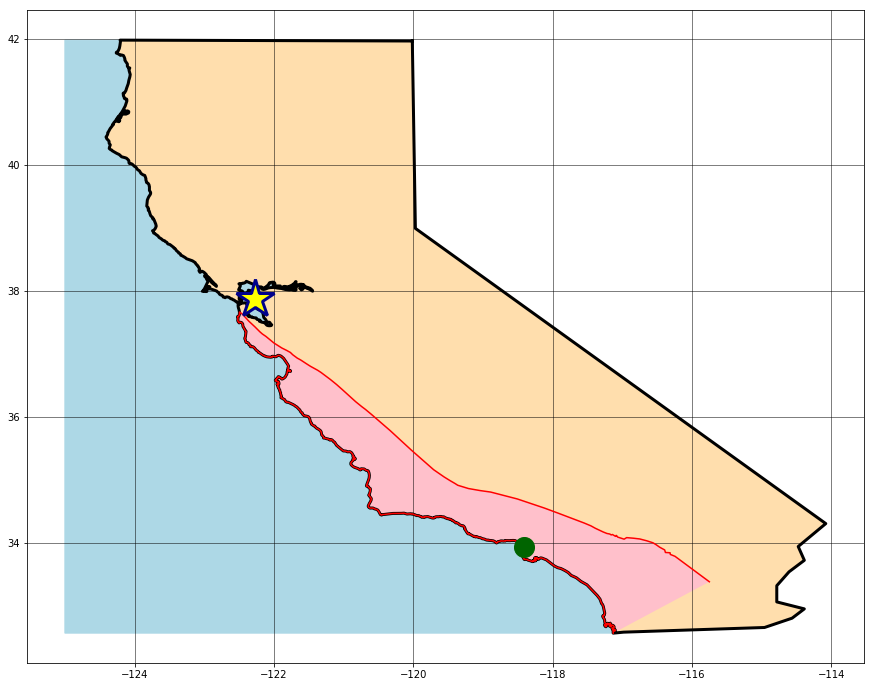

In [7]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink')

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)

plt.grid(color='k', linestyle='-', linewidth=0.5)
plt.show()

In [8]:
rate = 35e-3 #rate of movements in meters
years = np.array([1e6,5e6,25e6])
dist_moved = years*rate #distance moved in meters

In [69]:
dist_moved
print('In 1 million years, the plate would have moved',dist_moved[0],'meters toward Northwest.')
print('In 5 million years, the plate would have moved',dist_moved[1],'meters toward Northwest.')
print('In 25 million years, the plate would have moved',dist_moved[2],'meters toward Northwest.')

In 1 million years, the plate would have moved 35000.0 meters toward Northwest.
In 5 million years, the plate would have moved 175000.00000000003 meters toward Northwest.
In 25 million years, the plate would have moved 875000.0000000001 meters toward Northwest.


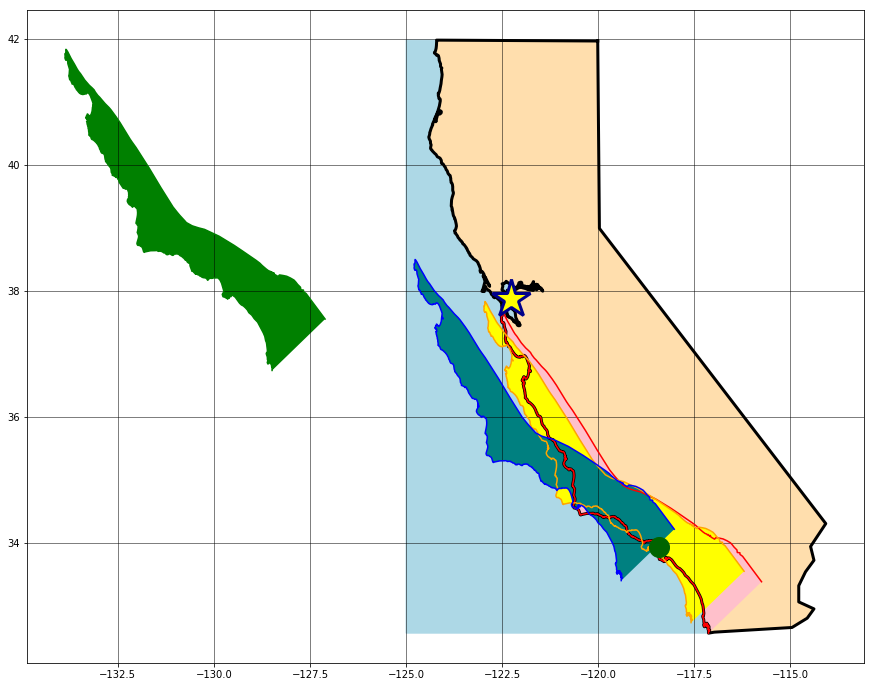

In [68]:
x_comps = np.array([])# displacements of the plate for each timeframe in meters
y_comps = np.array([])
for i in range(3):
    x_comp = np.cos(np.radians(32))*dist_moved[i]
    y_comp = np.sqrt(dist_moved[i]**2 - x_comp**2)
    x_comps = np.append(x_comps,x_comp)
    y_comps = np.append(y_comps,y_comp)
    
    
R = 6.371e6
lat_convert = (2*np.pi*R)/360
lon_convert = (np.pi*R*np.cos(35.5))/180

new_plate0 = plate[:,0]*lon_convert
new_plate1 = plate[:,1]*lat_convert

disp0 = np.array([]) #3 stacked arrays with displaced plates in meters
disp1 = np.array([])
for i in range(3):
    if i == 0:
        disp0 = np.append(disp0, new_plate0+x_comps[i])
        disp1 = np.append(disp1, new_plate1+y_comps[i])
    else:
        disp0 = np.vstack((disp0, new_plate0+x_comps[i]))
        disp1 = np.vstack((disp1, new_plate1+y_comps[i]))

disp0_deg = disp0/lon_convert # convert the displaced plates back into degrees
disp1_deg = disp1/lat_convert


plt.rcParams['figure.figsize'] = [15, 12]

plt.plot(CAB[:,0],CAB[:,1],'k-',lw=3)
plt.fill(CAB[:,0],CAB[:,1],'navajowhite')

#plt.fill(land[:,0],land[:,1],'-',color='lightgrey')
plt.fill(ocean[:,0],ocean[:,1],'-',color='lightblue')

plt.plot(plate[:,0],plate[:,1],'r-')
plt.fill(plate[:,0],plate[:,1],'pink') #Original

plt.plot(disp0_deg[0],disp1_deg[0],'orange')#1 million years
plt.fill(disp0_deg[0],disp1_deg[0],'yellow')

plt.plot(disp0_deg[1],disp1_deg[1],'b-')# 5 million years
plt.fill(disp0_deg[1],disp1_deg[1],'teal')

plt.plot(disp0_deg[2],disp1_deg[2],'g-') #25 million years
plt.fill(disp0_deg[2],disp1_deg[2],'green')

plt.grid(color='k', linestyle='-', linewidth=0.5)

plt.plot(lon_LAX,lat_LAX,'o',color='darkgreen',ms=20)
plt.plot(lon_UCB,lat_UCB,'*',mec='darkblue',mew=3,mfc='yellow',ms=40)


plt.show()